In [8]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 4.8 MB/s 
     |████████████████████████████████| 1.2 MB 49.2 MB/s 
     |████████████████████████████████| 6.8 MB 23.2 MB/s 
     |████████████████████████████████| 10.1 MB 30.4 MB/s 
     |████████████████████████████████| 248 kB 72.7 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
     |████████████████████████████████| 269 kB 47.1 MB/s 
     |████████████████████████████████| 127.6 MB 21 kB/s 
     |████████████████████████████████| 302 kB 45.8 MB/s 
     |████████████████████████████████| 14.5 MB 28.0 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=a612fd03fdc2813177510782134b6cca70999975198b6764972163bb606e65e8
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: num

In [45]:
import pandas as pd
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/bankrupt.csv')

In [6]:
X=df.drop(columns=['Bankrupt?'])

In [7]:
y=df['Bankrupt?']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [38]:
models.iloc[:,3]

Model
BernoulliNB                     0.88
NearestCentroid                 0.93
QuadraticDiscriminantAnalysis   0.57
AdaBoostClassifier              0.97
SGDClassifier                   0.97
GaussianNB                      0.62
DecisionTreeClassifier          0.96
XGBClassifier                   0.97
LinearDiscriminantAnalysis      0.97
Perceptron                      0.96
LGBMClassifier                  0.97
LabelSpreading                  0.96
LabelPropagation                0.96
BaggingClassifier               0.97
LogisticRegression              0.96
PassiveAggressiveClassifier     0.96
ExtraTreeClassifier             0.95
RandomForestClassifier          0.96
RidgeClassifier                 0.96
LinearSVC                       0.96
ExtraTreesClassifier            0.96
RidgeClassifierCV               0.96
KNeighborsClassifier            0.96
CalibratedClassifierCV          0.96
DummyClassifier                 0.94
SVC                             0.96
Name: F1 Score, dtype: float64

In [32]:
models.iloc[:,0]

Model
BernoulliNB                     0.83
NearestCentroid                 0.90
QuadraticDiscriminantAnalysis   0.43
AdaBoostClassifier              0.97
SGDClassifier                   0.97
GaussianNB                      0.47
DecisionTreeClassifier          0.96
XGBClassifier                   0.98
LinearDiscriminantAnalysis      0.97
Perceptron                      0.96
LGBMClassifier                  0.98
LabelSpreading                  0.96
LabelPropagation                0.96
BaggingClassifier               0.97
LogisticRegression              0.97
PassiveAggressiveClassifier     0.97
ExtraTreeClassifier             0.95
RandomForestClassifier          0.97
RidgeClassifier                 0.97
LinearSVC                       0.97
ExtraTreesClassifier            0.97
RidgeClassifierCV               0.97
KNeighborsClassifier            0.97
CalibratedClassifierCV          0.97
DummyClassifier                 0.94
SVC                             0.97
Name: Accuracy, dtype: float64

In [ ]:
models.iloc[:,0]

In [46]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [48]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9758064516129032

XGBoost Feature Importances

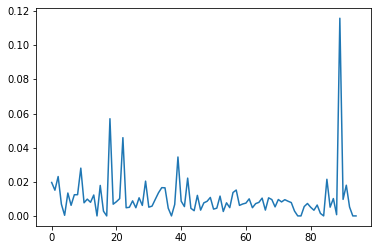

In [50]:
plt.plot(model.feature_importances_)

In [51]:
model.feature_importances_

array([0.01960206, 0.01507702, 0.02308379, 0.00690223, 0.00036632,
       0.01341607, 0.00620866, 0.01240242, 0.01243878, 0.02800804,
       0.00769837, 0.00983527, 0.00798201, 0.01225545, 0.        ,
       0.01785881, 0.00278778, 0.        , 0.05697318, 0.00687819,
       0.00833184, 0.01013714, 0.04586854, 0.00479601, 0.00506672,
       0.00882373, 0.00479155, 0.01062122, 0.00616134, 0.02038056,
       0.00512718, 0.00574433, 0.00970881, 0.01358719, 0.01656613,
       0.01647413, 0.0045326 , 0.        , 0.00671296, 0.03453138,
       0.00863294, 0.00546591, 0.0221536 , 0.00446795, 0.00305037,
       0.01204685, 0.00340248, 0.00766265, 0.00856291, 0.01081664,
       0.00399067, 0.00453636, 0.01161556, 0.00259619, 0.00767316,
       0.0048452 , 0.01370759, 0.01517281, 0.00617118, 0.00698965,
       0.00752047, 0.01001415, 0.00479727, 0.00720169, 0.00793896,
       0.01042433, 0.0034156 , 0.01059755, 0.00958182, 0.00530159,
       0.00961861, 0.00819664, 0.00952418, 0.00861486, 0.00782